
# Name: Shawn Cogan
# Date: 04/18/24
# Assignment: ML Project

# Honor Pledge: On my honor, I pledge I have neither given nor received unauthorized aid.



In [ ]:
# Import essential data analysis/ML libraries
import numpy as np
import pandas as pd

import sys
print("python version: {} ".format(sys.version))

import pandas as pd
print("pandas version: {} ".format(pd.__version__))

import matplotlib
print("matplotlib version: {} ".format(matplotlib.__version__))

import scipy as sp
print("scipy version: {} ".format(sp.__version__))

import numpy as np
print("numpy version: {} ".format(np.__version__))

import IPython
print("IPython version: {} ".format(IPython.__version__))

import sklearn
print("scikit-sklearn version: {}".format(sklearn.__version__))

python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] 
pandas version: 2.0.3 
matplotlib version: 3.7.1 
scipy version: 1.11.4 
numpy version: 1.25.2 
IPython version: 7.34.0 
scikit-sklearn version: 1.2.2


In [ ]:
# Import and display data (link comes from website)
heart = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")

# Display in full
display(heart)

# Display unique values for target
display(heart["num"].unique())


# Print information about data and data keys
print(heart.info)

print(heart.keys())

# Find total number of missing values
print(heart.isnull().sum())



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


array([0, 2, 1, 3, 4])

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0

In [ ]:
# Missing values in ca and thal

#Find most common value in thal

thal_value_counts = heart["thal"].value_counts(dropna=True)
most_common_value_thal = thal_value_counts.index[0]

# state most common thal value
print(most_common_value_thal)

# Replace null with value
heart["thal"].fillna(most_common_value_thal, inplace=True)


#Find most common value in ca

ca_value_counts = heart["ca"].value_counts(dropna=True)
most_common_value_ca = ca_value_counts.index[0]

# state most common thal value
print(most_common_value_ca)

# Replace null with value
heart["ca"].fillna(most_common_value_ca, inplace=True)

# Confirm there are no more missing values
print(heart.isnull().sum())



3.0
0.0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
# Split data into attributes and target (num col) and observe each shape
heart_target = heart.loc[:,["num"]]
print(heart_target.shape)

heart_features = heart.drop(['num'], axis =1)
print(heart_features.shape)

(303, 1)
(303, 13)


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>,
        <Axes: xlabel='num', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='sex'

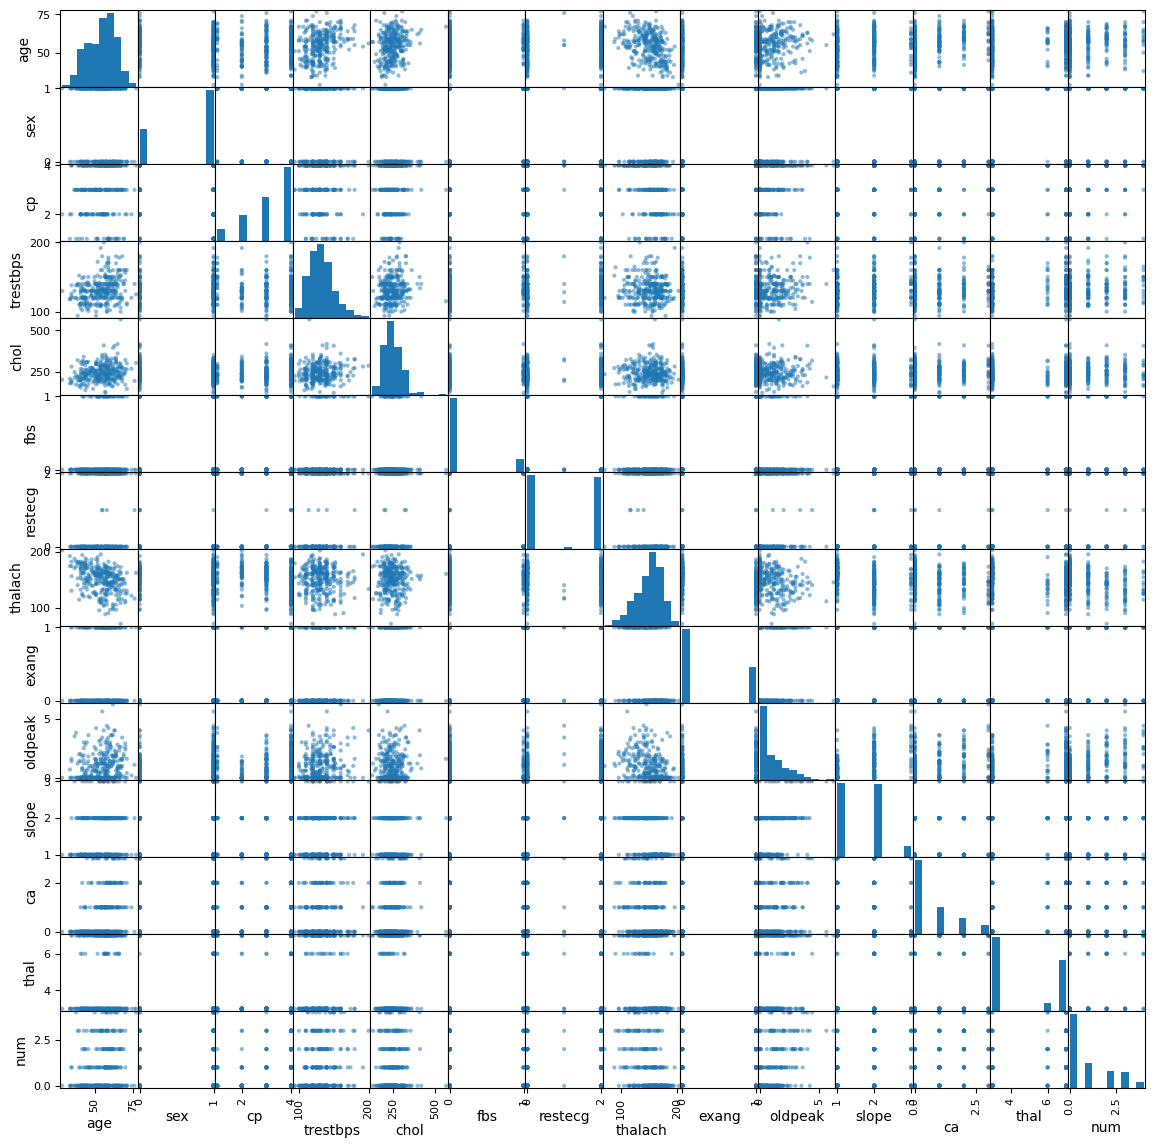

In [ ]:
# Observe statistics of data and make plots

# individual analysis of each feature
heart_features.describe()

# Plot correlations between each of the features and target
from pandas.plotting import scatter_matrix
scatter_matrix(heart, figsize=(14,14))

<Axes: >

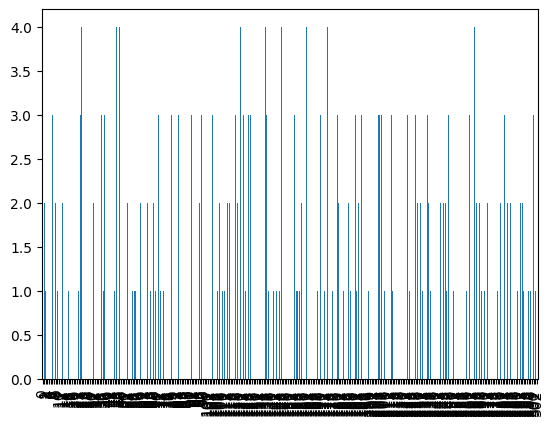

In [ ]:
# Histogram for num (target data)
# higher number, higher angiographic status, more severe diagnosis
heart["num"].plot(kind="bar")

In [ ]:
# Quantify correlations
print(heart.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.365323  0.086048  0.233117  0.097528  0.123726  0.140764   
thal      0.128303  0.380581  0.262089  0.134424  0.018351  0.06

In [ ]:
# import tree libraries and split from sk learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#create a training dataset and a test dataset using a 75/25 split

heart_split = train_test_split(heart_features, heart_target,
                              test_size=0.25, random_state=17)
df_heart_features_train = heart_split[0]
df_heart_features_test = heart_split[1]
df_heart_target_train = heart_split[2]
df_heart_target_test = heart_split[3]

#create a decision tree based multi-class classifier
dtree_model = DecisionTreeClassifier(max_depth=15)
dtree_model.fit(df_heart_features_train, df_heart_target_train)


DecisionTreeClassifier(max_depth=15)

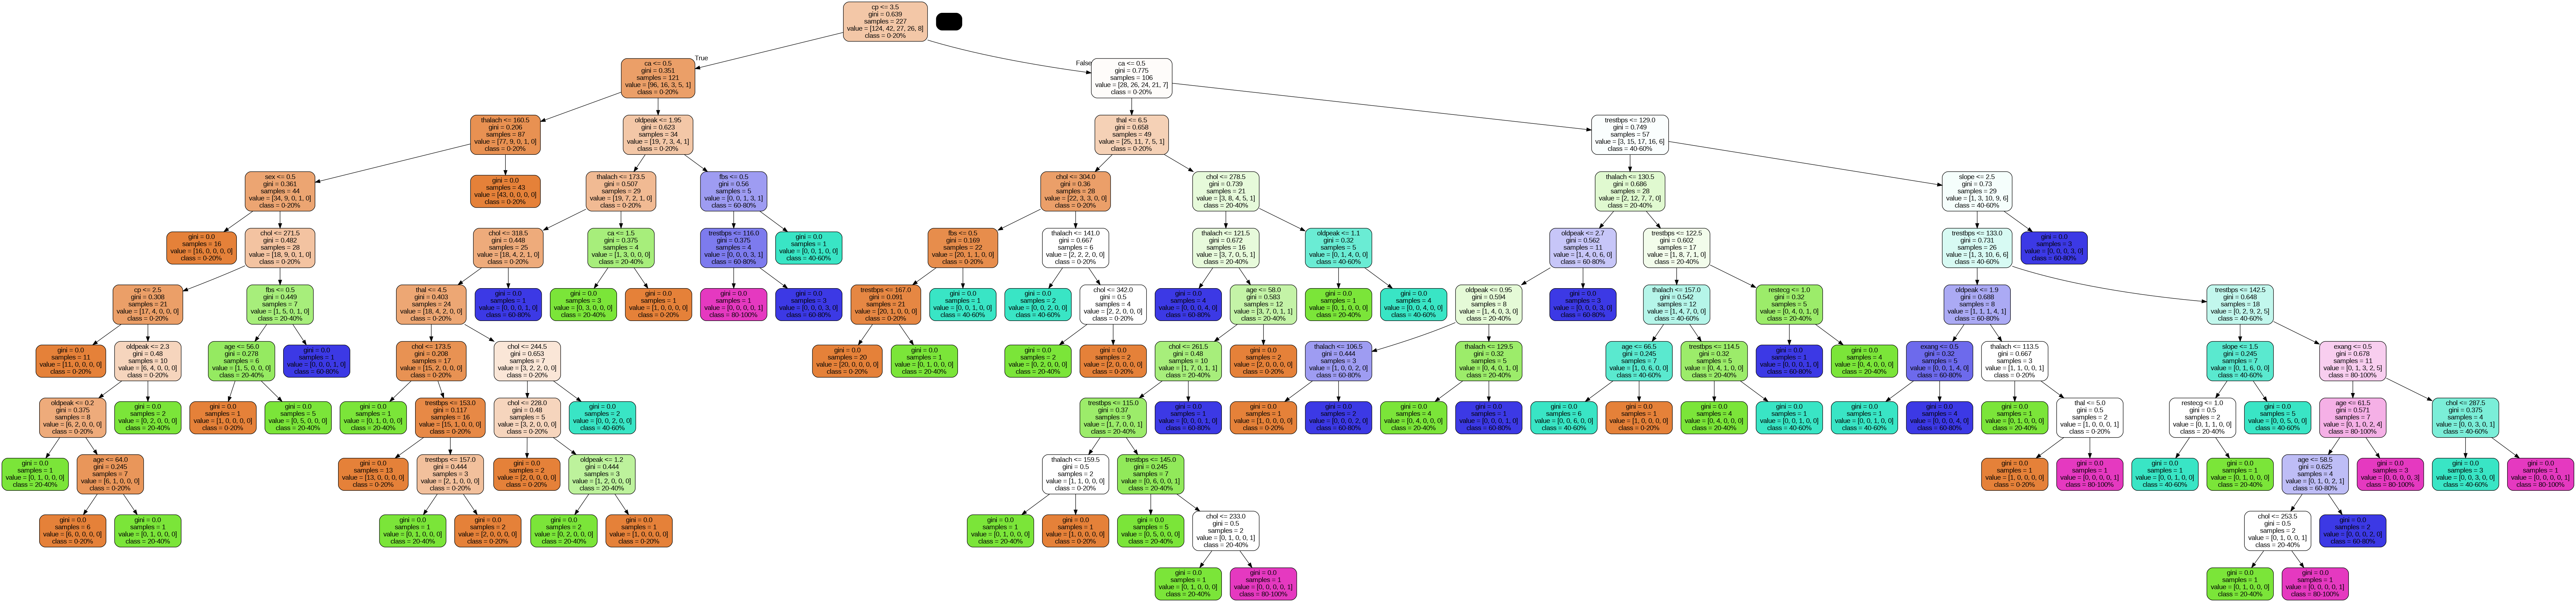

In [ ]:
#visualize
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

# Create and display decision tree
dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,
                filled=True, rounded=True,
                feature_names=heart_features.keys(),
                class_names=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"],
                )

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# import accruacy metric
from sklearn.metrics import accuracy_score

# Predict with split data
pred = dtree_model.predict(df_heart_features_test)
# Get accuracy score
score = accuracy_score(df_heart_target_test, pred)

# output score
print(score)

0.4605263157894737
